# Proyek Analisis Data: [Air_quality_dataset
- **Nama:** Bagus Purnomo
- **Email:** Baguspurnomo770@gmail.com
- **ID Dicoding:** gooddev_https://www.dicoding.com/users/gooddev/academies

## Menentukan Pertanyaan Bisnis

- Stasiun mana yang memiliki tingkat polusi tertinggi atau terendah berdasarkan parameter tertentu ?
- Apakah terdapat korelasi antara suhu (TEMP) dan kadar ozon (O3) dengan tingkat polusi udara?

## Import Semua Packages/Library yang Digunakan

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import statsmodels.api as sm
import pkgutil


## Data Wrangling

### Melakukan upload folder dan mengekstraksi folder

In [ ]:
from google.colab import files

# Memilih file zip dari perangkat lokal Anda
uploaded = files.upload()

# Mendapatkan nama file yang diunggah
file_name = list(uploaded.keys())[0]

# Menampilkan informasi file yang diunggah
print(f'File {file_name} berhasil diunggah!')

# Ekstraksi file zip (opsional)
import zipfile
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall()

print(f'File {file_name} berhasil diekstraksi!')


Saving Air-quality-dataset.zip to Air-quality-dataset.zip
File Air-quality-dataset.zip berhasil diunggah!
File Air-quality-dataset.zip berhasil diekstraksi!


In [ ]:
import shutil

# Path awal file yang diunggah
source_path = f'/content/PRSA_Data_20130301-20170228'

# Path tujuan (misalnya, "/content/PRSA_Data_20130301-20170228")
destination_path = '/PRSA_Data_20130301-20170228'

# Memindahkan file ke tujuan
shutil.move(source_path, destination_path)

print(f'File {file_name} berhasil dipindahkan ke {destination_path}')


File Air-quality-dataset.zip berhasil dipindahkan ke /PRSA_Data_20130301-20170228


### Memuat seluruh data dan menampilkan 5 baris pertama


In [ ]:
import os

# Path ke direktori
directory_path = '/PRSA_Data_20130301-20170228'

# Mendapatkan daftar file dalam direktori
file_list = os.listdir(directory_path)

# Menyimpan setiap file ke dalam variabel baru
for file in file_list:
    if file.endswith('.csv'):
        # Membuat nama variabel berdasarkan nama file
        variable_name = file.replace('.csv', '')
        variable_name = variable_name.replace('PRSA_Data_', 'air_quality_')
        variable_name = variable_name.replace('-', '_')
        variable_name = variable_name.replace('_20130301_20170228', '')

        # Mengonversi file CSV ke DataFrame dan menyimpan dalam variabel baru
        globals()[variable_name] = pd.read_csv(os.path.join(directory_path, file))

        # Menampilkan 5 baris pertama dari variabel baru
        print(f'{variable_name}.head(1):')
        print(globals()[variable_name].head())
        print('\n')


air_quality_Wanshouxigong.head(1):
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong  


air_quality_Tiantan.head(1):
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5   
1   2  2013      3    1  

### Assessing Data

### Sebelum melakukan assesing data, Akan dilakukan merge data terlebih dahulu untuk meningkatkan efektifitas proses analisis data

In [ ]:
# Menggabungkan data dari semua variabel
air_quality_all = pd.concat([
    air_quality_Aotizhongxin,
    air_quality_Dongsi,
    air_quality_Gucheng,
    air_quality_Wanshouxigong,
    air_quality_Huairou,
    air_quality_Guanyuan,
    air_quality_Changping,
    air_quality_Nongzhanguan,
    air_quality_Tiantan,
    air_quality_Dingling,
    air_quality_Shunyi,
    air_quality_Wanliu
], axis=0, ignore_index=True)
print("Penggabungan data sukses")



Penggabungan data sukses


In [ ]:
# Menampilkan 5 Data Pertama
air_quality_all.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
# Menampilkan 5 Data Terakhir
air_quality_all.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420763,35060,2017,2,28,19,11.0,27.0,4.0,20.0,300.0,81.0,12.6,1011.9,-14.3,0.0,N,2.0,Wanliu
420764,35061,2017,2,28,20,15.0,43.0,6.0,55.0,500.0,45.0,9.4,1012.3,-11.9,0.0,WSW,1.0,Wanliu
420765,35062,2017,2,28,21,13.0,35.0,7.0,48.0,500.0,48.0,8.7,1012.8,-13.7,0.0,N,1.1,Wanliu
420766,35063,2017,2,28,22,12.0,31.0,5.0,47.0,500.0,50.0,7.8,1012.9,-12.6,0.0,NNE,1.0,Wanliu
420767,35064,2017,2,28,23,7.0,25.0,6.0,86.0,700.0,11.0,7.0,1012.6,-11.2,0.0,NE,1.1,Wanliu


In [ ]:
air_quality_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [ ]:
air_quality_all.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Dari informasi data yang diberikan Beberapa kolom memiliki nilai yang kurang (non-null count kurang dari total jumlah entri) antara lain :PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM Hal ini menunjukkan adanya missing values pada kolom-kolom tersebut

In [ ]:
# Menghapus kolom "No"
air_quality_all = air_quality_all.drop(columns=['No'])

In [ ]:
air_quality_all.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [ ]:
print("Cek Duplikasi : ",air_quality_all.duplicated().sum())


Cek Duplikasi :  0


### Cleaning Data

### Menangani Missing Value


In [ ]:
# Menggantikan missing values dengan nilai mean
air_quality_all['PM2.5'].fillna(air_quality_all['PM2.5'].mean(), inplace=True)
air_quality_all['PM10'].fillna(air_quality_all['PM10'].mean(), inplace=True)
air_quality_all['SO2'].fillna(air_quality_all['SO2'].mean(), inplace=True)
air_quality_all['NO2'].fillna(air_quality_all['NO2'].mean(), inplace=True)
air_quality_all['CO'].fillna(air_quality_all['CO'].mean(), inplace=True)
air_quality_all['O3'].fillna(air_quality_all['O3'].mean(), inplace=True)
air_quality_all['TEMP'].fillna(air_quality_all['TEMP'].mean(), inplace=True)
air_quality_all['PRES'].fillna(air_quality_all['PRES'].mean(), inplace=True)
air_quality_all['DEWP'].fillna(air_quality_all['DEWP'].mean(), inplace=True)
air_quality_all['RAIN'].fillna(air_quality_all['RAIN'].mean(), inplace=True)
air_quality_all['WSPM'].fillna(air_quality_all['WSPM'].mean(), inplace=True)

air_quality_all['wd'].fillna(air_quality_all['wd'].mode()[0], inplace=True)


In [ ]:
# Memeriksa apakah masih ada missing values
air_quality_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   year     420768 non-null  int64         
 1   month    420768 non-null  int64         
 2   day      420768 non-null  int64         
 3   hour     420768 non-null  int64         
 4   PM2.5    420768 non-null  float64       
 5   PM10     420768 non-null  float64       
 6   SO2      420768 non-null  float64       
 7   NO2      420768 non-null  float64       
 8   CO       420768 non-null  float64       
 9   O3       420768 non-null  float64       
 10  TEMP     420768 non-null  float64       
 11  PRES     420768 non-null  float64       
 12  DEWP     420768 non-null  float64       
 13  RAIN     420768 non-null  float64       
 14  wd       420768 non-null  object        
 15  WSPM     420768 non-null  float64       
 16  station  420768 non-null  object        
 17  date     4

## Exploratory Data Analysis (EDA)

In [ ]:
kategori_wd = air_quality_all['wd'].value_counts()
print(kategori_wd)

NE     45157
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: wd, dtype: int64


In [56]:
correlation_matrix = air_quality_all[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
correlation_matrix

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.879389,0.477582,0.658108,0.768664,-0.147204,-0.129715,0.018357,0.113499,-0.014156,-0.269023
PM10,0.879389,1.000000,0.458519,0.645448,0.686716,-0.109983,-0.095395,-0.017806,0.069767,-0.026360,-0.181835
SO2,0.477582,0.458519,1.000000,0.491109,0.524707,-0.162283,-0.318067,0.220414,-0.263895,-0.040029,-0.107549
NO2,0.658108,0.645448,0.491109,1.000000,0.688207,-0.463523,-0.273864,0.171262,-0.031135,-0.043357,-0.393849
CO,0.768664,0.686716,0.524707,0.688207,1.000000,-0.305255,-0.317872,0.183004,-0.055615,-0.013008,-0.290044
O3,-0.147204,-0.109983,-0.162283,-0.463523,-0.305255,1.000000,0.585303,-0.438657,0.307678,0.023146,0.291641
TEMP,-0.129715,-0.095395,-0.318067,-0.273864,-0.317872,0.585303,1.000000,-0.813300,0.820115,0.037635,0.033029
PRES,0.018357,-0.017806,0.220414,0.171262,0.183004,-0.438657,-0.813300,1.000000,-0.750212,-0.060948,0.065086
DEWP,0.113499,0.069767,-0.263895,-0.031135,-0.055615,0.307678,0.820115,-0.750212,1.000000,0.086291,-0.296524
RAIN,-0.014156,-0.026360,-0.040029,-0.043357,-0.013008,0.023146,0.037635,-0.060948,0.086291,1.000000,0.021018


In [ ]:
# Menghitung rata-rata tiap parameter berdasarkan stasiun
avg_pollution_by_station = air_quality_all.groupby('station')[['PM2.5', 'PM10', 'NO2', 'CO']].mean()

# Menemukan stasiun dengan rata-rata tinggi untuk setiap parameter
station_highest_avg_PM25 = avg_pollution_by_station['PM2.5'].idxmax()
station_highest_avg_PM10 = avg_pollution_by_station['PM10'].idxmax()
station_highest_avg_NO2 = avg_pollution_by_station['NO2'].idxmax()
station_highest_avg_CO = avg_pollution_by_station['CO'].idxmax()

# Menemukan stasiun dengan rata-rata rendah untuk setiap parameter
station_lowest_avg_PM25 = avg_pollution_by_station['PM2.5'].idxmin()
station_lowest_avg_PM10 = avg_pollution_by_station['PM10'].idxmin()
station_lowest_avg_NO2 = avg_pollution_by_station['NO2'].idxmin()
station_lowest_avg_CO = avg_pollution_by_station['CO'].idxmin()

# Menampilkan hasil
print("Stasiun dengan rata-rata tinggi:")
print(f"PM2.5: {station_highest_avg_PM25}")
print(f"PM10: {station_highest_avg_PM10}")
print(f"NO2: {station_highest_avg_NO2}")
print(f"CO: {station_highest_avg_CO}\n")

print("Stasiun dengan rata-rata rendah:")
print(f"PM2.5: {station_lowest_avg_PM25}")
print(f"PM10: {station_lowest_avg_PM10}")
print(f"NO2: {station_lowest_avg_NO2}")
print(f"CO: {station_lowest_avg_CO}")

Stasiun dengan rata-rata tinggi:
PM2.5: Dongsi
PM10: Gucheng
NO2: Wanliu
CO: Wanshouxigong

Stasiun dengan rata-rata rendah:
PM2.5: Dingling
PM10: Dingling
NO2: Dingling
CO: Dingling


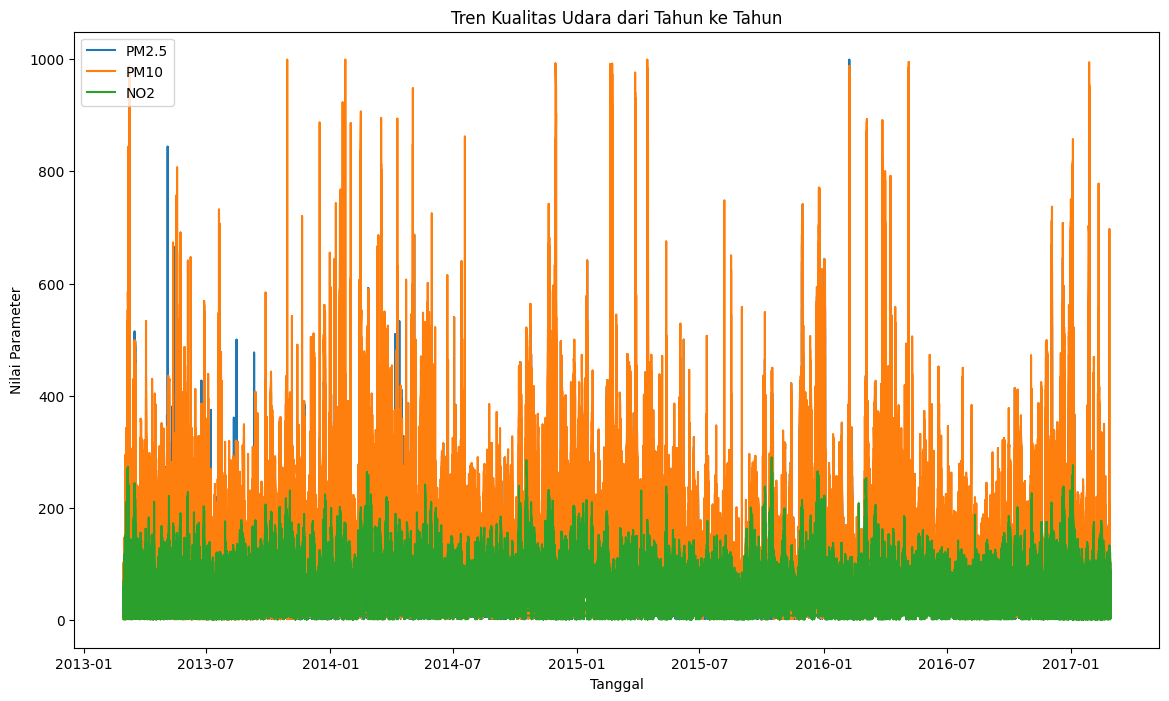

In [ ]:
# Menggabungkan kolom 'year', 'month', dan 'day' menjadi satu kolom 'date'
air_quality_all['date'] = pd.to_datetime(air_quality_all[['year', 'month', 'day']])

# Memilih kolom-kolom yang ingin dianalisis
columns_to_plot = ['PM2.5', 'PM10', 'NO2']

# Menggambar grafik untuk setiap parameter
plt.figure(figsize=(14, 8))

for column in columns_to_plot:
    plt.plot(air_quality_all['date'], air_quality_all[column], label=column)

plt.title('Tren Kualitas Udara dari Tahun ke Tahun')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Parameter')
plt.legend()
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

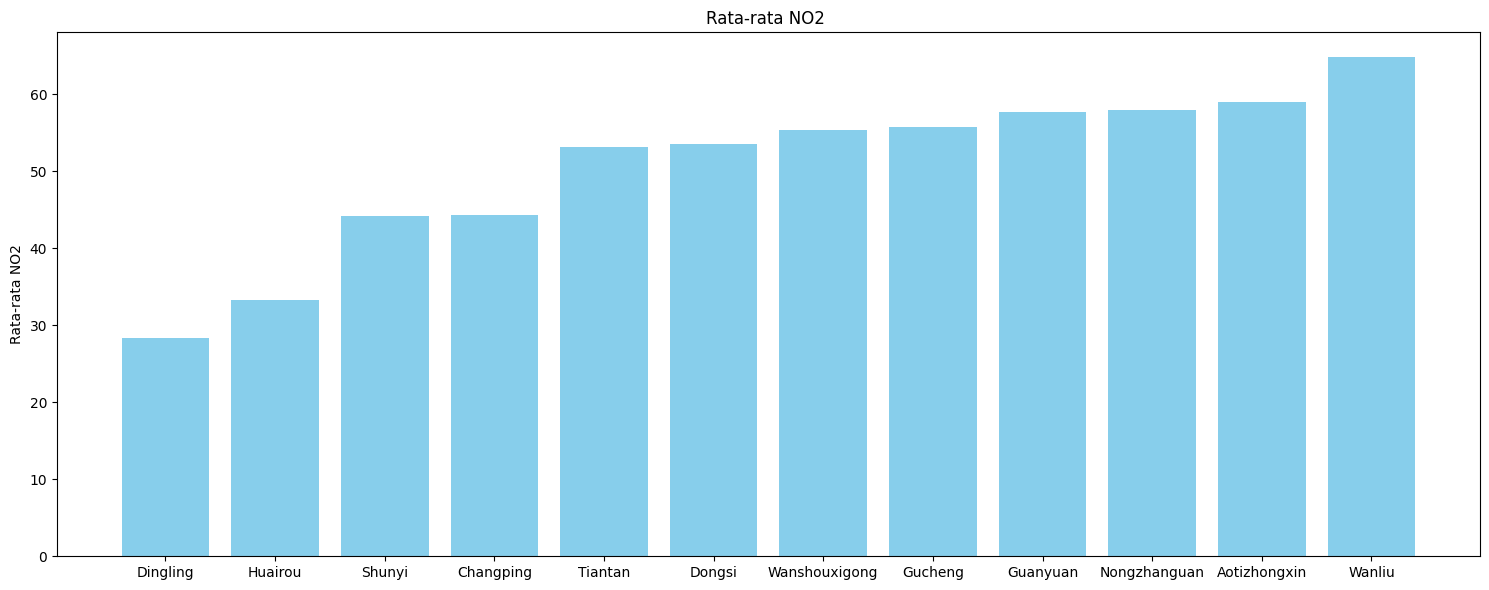

In [67]:
# Menghitung rata-rata NO2 berdasarkan stasiun
avg_pollution_by_station = air_quality_all.groupby('station')['NO2'].mean().sort_values()

# Visualisasi menggunakan grafik batang
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

# NO2
axes.bar(avg_pollution_by_station.index, avg_pollution_by_station, color='skyblue')
axes.set_title('Rata-rata NO2 ')
axes.set_ylabel('Rata-rata NO2')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

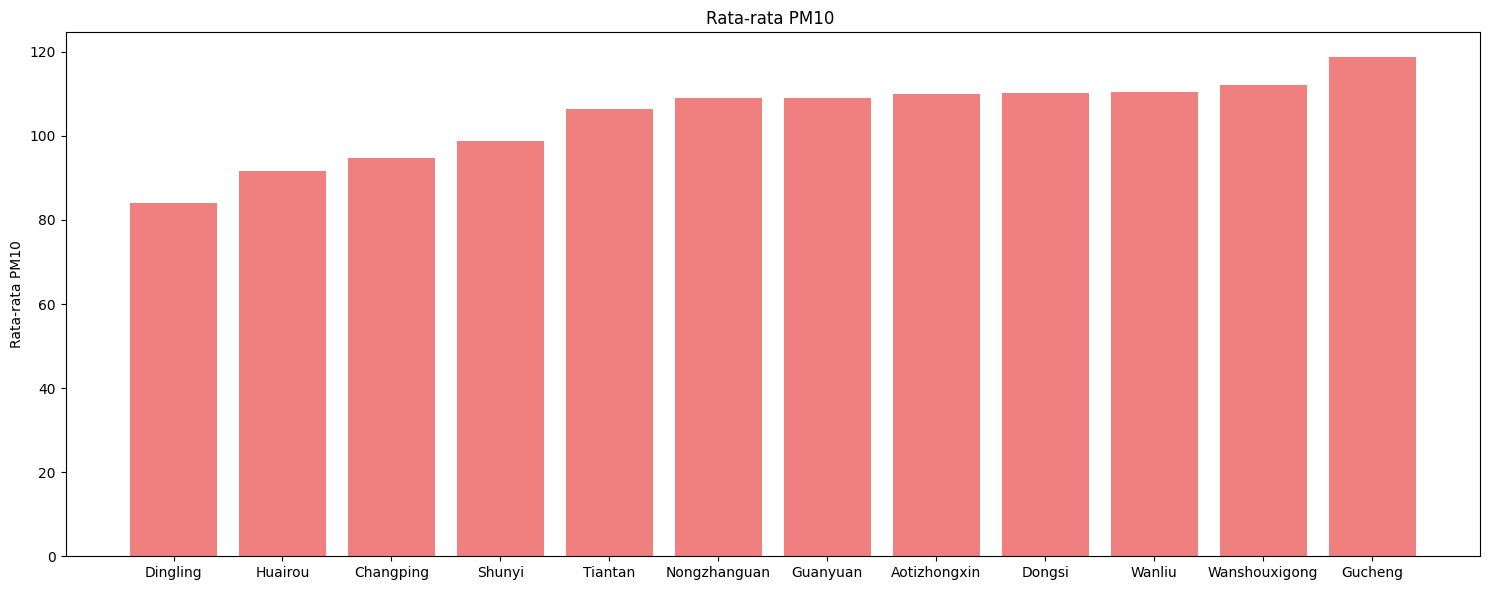

In [65]:
# Menghitung rata-rata PM10 berdasarkan stasiun
avg_pollution_by_station = air_quality_all.groupby('station')['PM10'].mean().sort_values()

# Visualisasi menggunakan grafik batang
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

# PM10
axes.bar(avg_pollution_by_station.index, avg_pollution_by_station, color='lightcoral')
axes.set_title('Rata-rata PM10 ')
axes.set_ylabel('Rata-rata PM10')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

### Pertanyaan 2:

<ipython-input-57-fec801a5febb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = air_quality_all.corr()


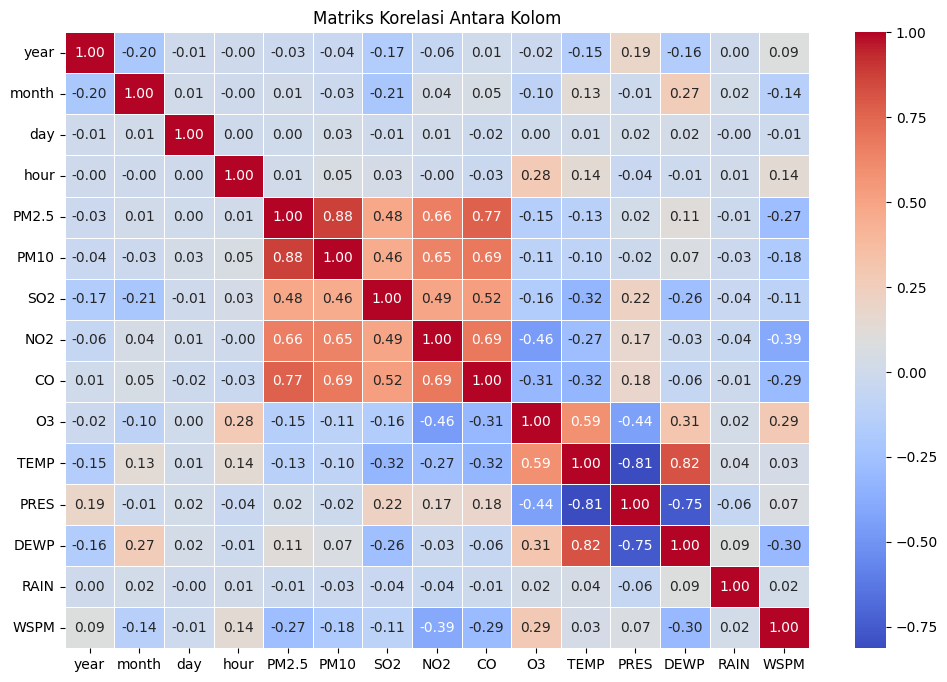

In [57]:
correlation_matrix = air_quality_all.corr()

# Visualisasi menggunakan heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, ha='right')
plt.title('Matriks Korelasi Antara Kolom')
plt.show()

In [66]:
# Menentukan variabel independen (X) dan dependen (y)
X = air_quality_all[['TEMP', 'O3']]
y = air_quality_all['PM10']

# Menambahkan konstanta ke variabel independen
X = sm.add_constant(X)

# Membuat model regresi
model = sm.OLS(y, X).fit()

# Menampilkan hasil analisis regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2892.
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        05:26:50   Log-Likelihood:            -2.4925e+06
No. Observations:              420768   AIC:                         4.985e+06
Df Residuals:                  420765   BIC:                         4.985e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        117.4098      0.224    524.813      0.0

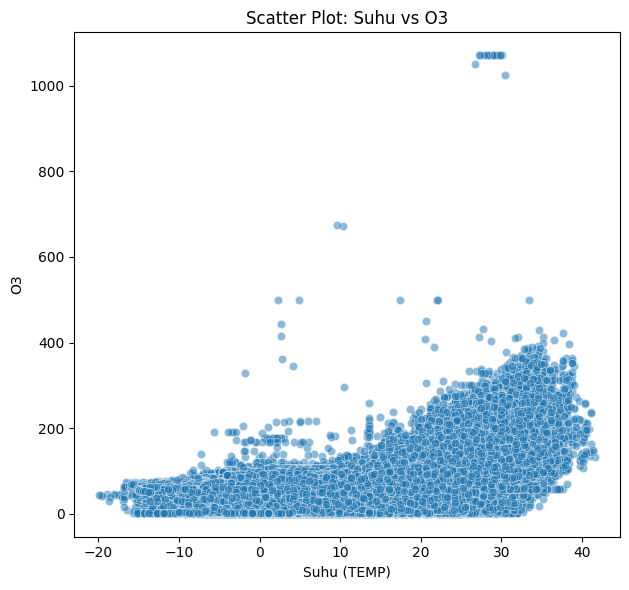

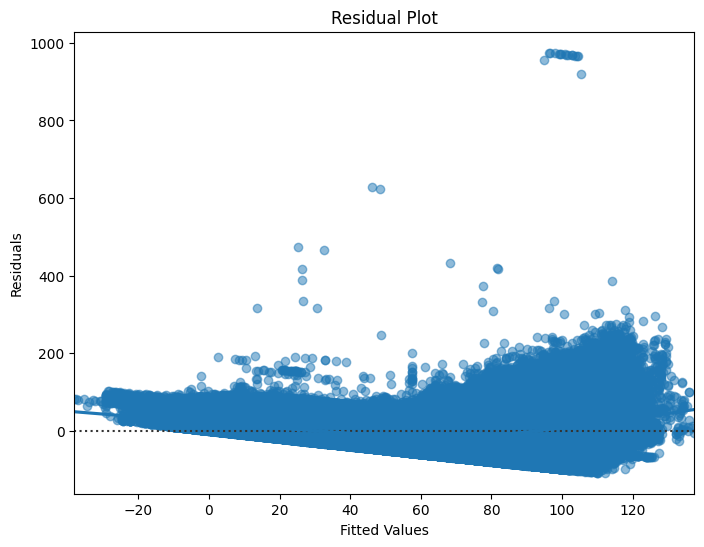

In [63]:
# Menentukan variabel independen (X) dan dependen (y)
X = air_quality_all[['TEMP']]
y = air_quality_all['O3']  # Anda dapat mengganti dengan variabel tingkat polusi lainnya

# Menambahkan konstanta ke variabel independen
X = sm.add_constant(X)

# Membuat model regresi
model = sm.OLS(y, X).fit()

# Visualisasi Scatter Plot
plt.figure(figsize=(12, 6))

# Scatter plot untuk suhu (TEMP) vs 'O3'
plt.subplot(1, 2, 1)
sns.scatterplot(x=air_quality_all['TEMP'], y=air_quality_all['O3'], alpha=0.5)
plt.title('Scatter Plot: Suhu vs O3')
plt.xlabel('Suhu (TEMP)')
plt.ylabel('O3')



plt.tight_layout()
plt.show()

# Visualisasi Plot Residu
plt.figure(figsize=(8, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, scatter_kws={'alpha': 0.5})
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

## Conclusion

- Conclution pertanyaan 1
Berdasarkan Parameter NO2 Stasiun Wanliu memiliki tingkat polusi tertinggi sedangkan berdasarkan Parameter PM10 adalah Stasiun Dingling dengan angka diatas 80
- Conclution pertanyaan 2
Meskipun analisis regresi menunjukkan adanya korelasi statistik antara suhu, kadar ozon, dan tingkat PM10, nilai R-squared yang rendah (2.5%) menandakan bahwa model ini hanya dapat menjelaskan sebagian kecil variabilitas dalam tingkat polusi udara, dan faktor-faktor lain mungkin memainkan peran penting.

In [64]:
air_quality_all.to_csv("air_quality_all.csv", index=False)

In [70]:
def get_imported_packages():
    imported_packages = []
    for _, name, _ in pkgutil.iter_modules():
        imported_packages.append(name)
    return imported_packages

imported_packages = get_imported_packages()
with open('requirements.txt', 'w') as file:
    for package in imported_packages:
        file.write(f'{package}\n')
